<center><div><img src = "http://china-bigdatauniversity.oss-cn-qingdao.aliyuncs.com/dolphin-labs/notebook-header-logo.png", width = 230/></div></center>

<h1 align=center><font size = 5>基于sklearn的人工神经网络</font></h1> 

<h2 align=center><font size = 2>【课程性质：机器学习算法-进阶】</font></h2> 

## 1. 实验目标

使用Sklearn库操作机器学习

## 2. 实验主要使用的 $Python$ 库

|名称|版本|简介|
|----|----|----|
|$Numpy$|$1.16.0$|线性代数|
|$Matplotlib$|$3.1.0$|数据可视化|
|$SKlearn$|$0.22.1$|机器学习|

## 3. 实验适用的对象

- 本课程假设您已经学习了 $Python$ 基础，具备可视化基础
- 学习对象：本科学生、研究生、人工智能、算法相关研究者、开发者
- 大数据分析与人工智能

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
<center>理论学习部分</center>
</div>

<p><b>机器学习(Machine Learning, ML)是人工智能(AI)的一个子集，是使计算机具有智能的根本途径。</b></p>
在本实验中，您将学习人工神经网络的基本思想、BP算法以及如何用Python中的sklearn实现。 

<font size=5>**概述**</font>
<p>受到生物学的启发，人工神经网络是由一系列简单的单元相互紧密联系构成的，每个单元有一定数量的实数输入和唯一的实数输出。神经网络的一个重要的用途就是接受和处理传感器产生的复杂的输入并进行自适应性的学习。人工神经网络算法模拟生物神经网络，是一种模式匹配算法，通常用于解决分类和回归问题。</p>
<p>传统神经网络结构比较简单，训练时随机初始化输入参数，并开启循环计算输出结果，与实际结果进行比较从而得到损失函数，并更新变量使损失函数结果值极小，当达到误差阈值时即可停止循环。</p>
<p>神经网络的训练目的是希望能够学习到一个模型，实现输出一个期望的目标值。学习的方式是在外界输入样本的刺激下不断改变网络的连接权值。传统神经网络主要分为以下几类：前馈型神经网络、反馈型神经网络和自组织神经网络。本实验主要讲解的是前馈型神经网络。</p>

<font size=3>**前馈神经网络**</font>


前馈神经网络是一种单向多层的网络结构，即信息是从输入层开始，逐层向一个方向传递，一直到输出层结束。所谓“前馈”是指输入信号的传播为前向，在此过程中不断调整各层的权值参数，而反传播时是将误差逐层向后传递，从而实现使用权值参数对特征的记忆，即通过反向传播（BP）算法来计算法各层网络中神经元之间的权重。BP算法具有非线性映射能力，理论上可逼近连续函数，从而实现对模型的学习

神经元是神经网络中最基本的成分，神经元的模型描述如下：
<ul>
    <li>每个神经元接受来自相邻神经元传递来的输入信号</li>
    <li>这些输入信号通过带权重的连接进行传递</li>
    <li>神经元收到的总收入值将与神经元的阈值进行比较，然后通过“激活函数”处理来产生神经元输出</li></ul>

多层前馈神经网络的结构如下图所示：
<ul>
    <li>每层神经元与下一层神经元全部互连</li>
    <li>同层神经元之间不存在连接</li>
    <li>跨层神经元之间也不存在连接</li></ul>
    <div>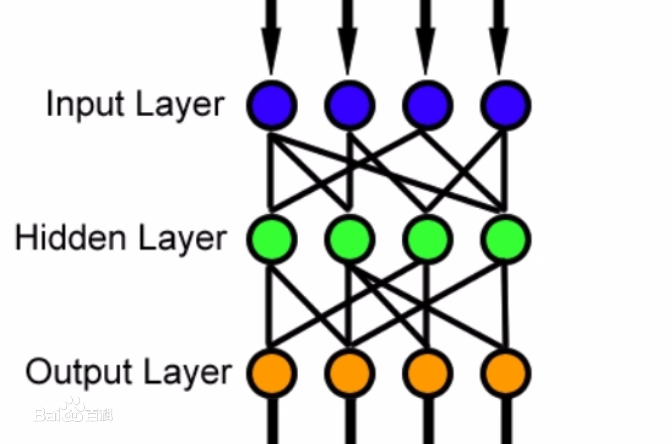</div>

多层前馈神经网络的特征如下：
<ul>
    <li>隐含层和输出层神经元都是拥有激活函数的功能神经元</li>
    <li>输入层接受外界输入信号，不进行激活函数处理</li>
    <li>最终结果有输出层给出</li></ul>

<font size=3>**BP算法**</font>
<p>神经网络的学习就是根据训练数据集来调整神经元之间的连接权重，以及每个功能神经元的阈值。</p>
<p>多层前馈神经网络的学习采用向传播（BP）算法，该算法的得到利用了导数的链式法则和sigmoid激活函数的性质。</p>
<p><b>BP算法如下：</b></p>
<p>输入：</p>
<ul>
    <li>训练数据集$T=\left\{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\right\},x_i\in\mathcal{X}\subseteq R^n,y_i\in\mathcal{Y}\subseteq R^m,i=1,2,\cdots,N$；</li>
    <li>学习率$\eta$</li>
    </ul>
<p>输出：</p>
<ul>
    <li>输入层到隐含层的$n\times q$个权值$v_{ih},i=1,2,\cdots,n;h=1,2,\cdots,q$；</li>
    <li>隐含层到输出层的$q\times m$个权值$w_{hj},h=1,2,\cdots,q;j=1,2,\cdots,m$；</li>
    <li>$q$个隐含层神经元的阈值$\gamma_h,h=1,2,\cdots,q$；</li>
    <li>$m$个输出层神经元的阈值$\theta_j,j=1,2,\cdots,m$；</li>
    </ul>
<p>算法步骤：</p> 
<ul>
    <p>在(0,1)范围内随机初始化网络中所有连接权值和阈值</p>
    <p>对训练数据集$T$中的样本点迭代，直到到达停止条件为止，迭代条件如下：</p>
    <ul>
        <li>取样本点$(x_k,y_k)$，根据当前参数计算该样本的输出$\hat{y}_k=(\hat{y}_k^{(1)},\hat{y}_k^{(2)},\cdots,\hat{y}_k^{(m)})^T$</li>
        <li>根据$g_j=-\hat{y}_k^{(k)}(1-\hat{y}_k^{(k)})(\hat{y}_k^{(k)}-y_k^{(j)})$,计算输出层神经元的梯度项$g_j$，其中$y_k=(y_k^{(1)},y_k^{(2)},\cdots,y_k^{(m)})$</li>
        <li>根据$e_h=b_h(1-b_h)\sum_{j=1}^mg_jw_{hj}$，其中$b_h$为隐含层第$h$个神经元的输出，计算隐层神经元的梯度项$e_h$</li>
        <li>根据下列式子更新连接权值$w_{hj}^\prime,v_{ih}^\prime$和阈值$\theta_j^\prime,\gamma_h^\prime$：$$w_{hj}^\prime=w_{hj}+\eta g_jb_h \\ \theta_j^\prime=\theta_j-\eta g_j \\ v_{ih}^\prime=v_{ih}+\eta e_hx^{(i)} \\ \gamma_h^\prime=\gamma_h-\eta e_h$$</li>
    </ul>

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
<center>实践学习部分</center>
</div>

## 4. 实验步骤

### 步骤1 安装并引入必要的库

在该实验中，我们使用的是scikit-learn自带的鸢尾花数据集iris进行分类。鸢尾花数据集一共有150个数据，分为三类，每类50个数据。每个数据包含4个属性：萼片长度、萼片宽度、花瓣长度、花瓣宽度。

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

```python
!pip install numpy==1.16.0
!pip install scikit-learn==0.22.1
!pip install matplotlib==3.1.0
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [ ]:
# 请输入代码：



<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

```python
import numpy as np
from sklearn.neural_network import MLPClassifier 
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [2]:
# 请输入代码：
import numpy as np
from sklearn.neural_network import MLPClassifier 
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline


### 步骤2 数据处理
我们这里使用iris数据集的前两个属性sepal length和sepal width，因为两个特征方便在二维图形上表现；然后对数据进行混洗；最后取出最后的30个数据作为测试集。

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
iris = datasets.load_iris()
X = iris.data[:,0:2]
Y = iris.target
data = np.hstack((X,Y.reshape(Y.size,1)))
np.random.seed(0)
np.random.shuffle(data)
X = data[:,0:2]
Y = data[:,-1]
X_train = X[0:-30]
X_test = X[-30:]
y_train = Y[0:-30]
y_test = Y[-30:]
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [3]:
# 请输入代码：
iris = datasets.load_iris()
X = iris.data[:,0:2]
Y = iris.target
data = np.hstack((X,Y.reshape(Y.size,1)))
np.random.seed(0)
np.random.shuffle(data)
X = data[:,0:2]
Y = data[:,-1]
X_train = X[0:-30]
X_test = X[-30:]
y_train = Y[0:-30]
y_test = Y[-30:]


### 步骤3  拟合预测
定义两个绘图函数：
<ul>
    <p>plot_samples：用于绘制样本点</p>
    <p>plot_classifier_predict_meshgrid：用于绘制分类器对平面上每个点进行分类预测的分布图</p></ul>

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
def plot_samples(ax,x,y):
    n_classes = 3
    plot_colors = "bry" # 颜色数组。每个类别的样本使用一种颜色
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax.scatter(x[idx, 0], x[idx, 1], c=color,label=iris.target_names[i], cmap=plt.cm.Paired) # 绘图
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [4]:
# 请输入代码：

def plot_samples(ax,x,y):
    n_classes = 3
    plot_colors = "bry" # 颜色数组。每个类别的样本使用一种颜色
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax.scatter(x[idx, 0], x[idx, 1], c=color,label=iris.target_names[i], cmap=plt.cm.Paired) # 绘图

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
def plot_classifier_predict_meshgrid(ax,clf,x_min,x_max,y_min,y_max):
    plot_step = 0.02 # 步长
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired) # 绘图
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

In [5]:
# 请输入代码：
def plot_classifier_predict_meshgrid(ax,clf,x_min,x_max,y_min,y_max):
    plot_step = 0.02 # 步长
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired) # 绘图


让我们利用scikit-learn提供的MLPClassifier()函数进行拟合预测，绘图分析。

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
classifier=MLPClassifier(activation='logistic',max_iter=10000,hidden_layer_sizes=(30,))
classifier.fit(X_train,y_train)
train_score=classifier.score(X_train,y_train)
test_score=classifier.score(X_test,y_test)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 2
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 2
plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
plot_samples(ax,X_train,y_train)
ax.legend(loc='best')
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_title("train score:%f;test score:%f"%(train_score,test_score))
plt.show()
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

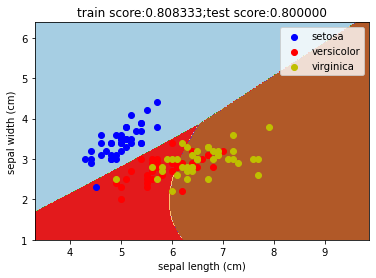

In [6]:
# 请输入代码：
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
classifier=MLPClassifier(activation='logistic',max_iter=10000,hidden_layer_sizes=(30,))
classifier.fit(X_train,y_train)
train_score=classifier.score(X_train,y_train)
test_score=classifier.score(X_test,y_test)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 2
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 2
plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
plot_samples(ax,X_train,y_train)
ax.legend(loc='best')
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_title("train score:%f;test score:%f"%(train_score,test_score))
plt.show()


从图中可以看到，分类器在训练数据上的预测精度为80.83%，在测试集上的预测精度为80%

### 步骤4 调参
scikit-learn的MLPClassifier的参数介绍：
<ul>
    <li>hidden_layer_sizes：是一个元组。元组制定了隐含层的结构，元组的长度表示隐含层的层数，元组的元素则指定了每一层隐含层中神经元的数量，该参数默认为(100,)，即只有一层隐含层且有100个神经元。</li>
    <li>activation：是个字符串，该参数指定了激活函数的类型，为'logistic'、'tanh'和'relu'。</li>
    <li>solver：是个字符串，该参数指定了采用的最优化算法的类型，为'lbfgs'、'sgd'和'adam'。</li>
    <li>learning_rate_init：是个小数，该参数为初始学习率，只有当使用'sgd'和'adam'这两个算法时才该参数才有意义。</li></ul>

#### 4.1 不同的隐含层对于多层神经网络分类器的影响

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
fig=plt.figure()
hidden_layer_sizes=[(10,),(30,),(100,),(5,5),(10,10),(30,30)] # 候选的 hidden_layer_sizes 参数值组成的数组
for itx,size in enumerate(hidden_layer_sizes):
    ax=fig.add_subplot(2,3,itx+1)
    classifier=MLPClassifier(activation='logistic',max_iter=10000,hidden_layer_sizes=size)
    classifier.fit(X_train,y_train)
    train_score=classifier.score(X_train,y_train)
    test_score=classifier.score(X_test,y_test)
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 2
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 2
    plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
    plot_samples(ax,X_train,y_train)
    ax.legend(loc='best',fontsize='xx-small')
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_title("layer_size:%s" % str(size))
    print("layer_size:%s;train score:%.2f;test score:%.2f"%(size,train_score,test_score))
plt.show()
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

layer_size:(10,);train score:0.78;test score:0.77
layer_size:(30,);train score:0.79;test score:0.80
layer_size:(100,);train score:0.81;test score:0.80
layer_size:(5, 5);train score:0.33;test score:0.37
layer_size:(10, 10);train score:0.34;test score:0.30
layer_size:(30, 30);train score:0.80;test score:0.77


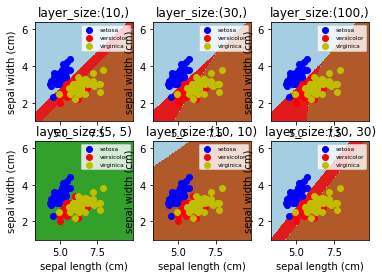

In [7]:
# 请输入代码：

fig=plt.figure()
hidden_layer_sizes=[(10,),(30,),(100,),(5,5),(10,10),(30,30)] # 候选的 hidden_layer_sizes 参数值组成的数组
for itx,size in enumerate(hidden_layer_sizes):
    ax=fig.add_subplot(2,3,itx+1)
    classifier=MLPClassifier(activation='logistic',max_iter=10000,hidden_layer_sizes=size)
    classifier.fit(X_train,y_train)
    train_score=classifier.score(X_train,y_train)
    test_score=classifier.score(X_test,y_test)
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 2
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 2
    plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
    plot_samples(ax,X_train,y_train)
    ax.legend(loc='best',fontsize='xx-small')
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_title("layer_size:%s" % str(size))
    print("layer_size:%s;train score:%.2f;test score:%.2f"%(size,train_score,test_score))
plt.show()

#### 4.2 不同的激活函数对于多层神经网络分类器的影响

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
fig=plt.figure()
fig.set_size_inches(16,8)
ativations=["logistic","tanh","relu"]
for itx,act in enumerate(ativations):
    ax=fig.add_subplot(1,3,itx+1)
    classifier=MLPClassifier(activation=act,max_iter=10000,hidden_layer_sizes=(30,))
    classifier.fit(X_train,y_train)
    train_score=classifier.score(X_train,y_train)
    test_score=classifier.score(X_test,y_test)
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 2
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 2
    plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
    plot_samples(ax,X_train,y_train)
    ax.legend(loc='best',fontsize='xx-small')
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_title("activation:%s" % act)
    print("activation:%s;train score:%.2f;test score:%.2f"%(act,train_score,test_score))
plt.show()
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

activation:logistic;train score:0.79;test score:0.77
activation:tanh;train score:0.81;test score:0.80
activation:relu;train score:0.81;test score:0.80


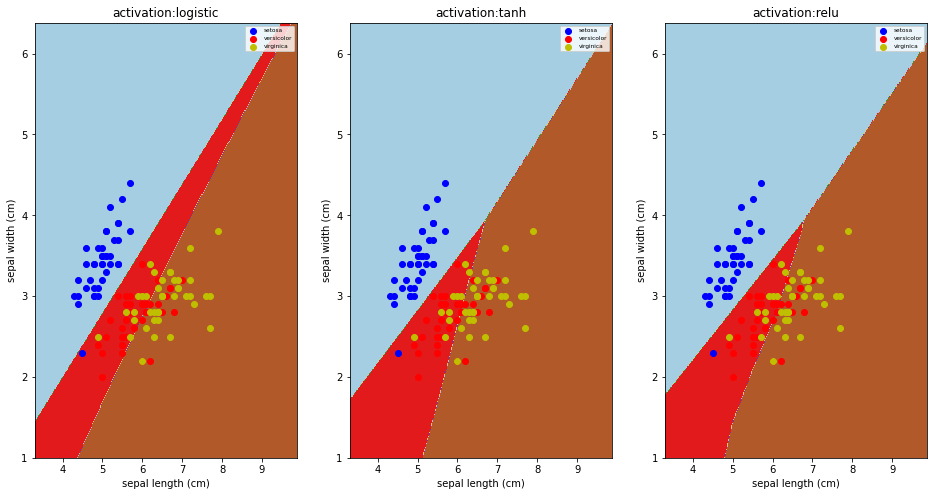

In [8]:
# 请输入代码：
fig=plt.figure()
fig.set_size_inches(16,8)
ativations=["logistic","tanh","relu"]
for itx,act in enumerate(ativations):
    ax=fig.add_subplot(1,3,itx+1)
    classifier=MLPClassifier(activation=act,max_iter=10000,hidden_layer_sizes=(30,))
    classifier.fit(X_train,y_train)
    train_score=classifier.score(X_train,y_train)
    test_score=classifier.score(X_test,y_test)
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 2
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 2
    plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
    plot_samples(ax,X_train,y_train)
    ax.legend(loc='best',fontsize='xx-small')
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_title("activation:%s" % act)
    print("activation:%s;train score:%.2f;test score:%.2f"%(act,train_score,test_score))
plt.show()


可以看到，不同的激活函数对性能有影响，但是相互之间没有显著差别。

#### 4.3 优化算法对多层神经网络分类器的影响

<div class="alert alert-success alertsuccess" style="margin-top: 5px">
代码示例：
</div>

``` Python
fig=plt.figure()
fig.set_size_inches(16,8)
solvers=["lbfgs","sgd","adam"] 
for itx,solver in enumerate(solvers):
    ax=fig.add_subplot(1,3,itx+1)
    classifier=MLPClassifier(activation="tanh",max_iter=10000,hidden_layer_sizes=(30,),solver=solver)
    classifier.fit(X_train,y_train)
    train_score=classifier.score(X_train,y_train)
    test_score=classifier.score(X_test,y_test)
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 2
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 2
    plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
    plot_samples(ax,X_train,y_train)
    ax.legend(loc='best',fontsize='xx-small')
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_title("solvers:%s" % solver)
    print("solvers:%s;train score:%.2f;test score:%.2f"%(solver,train_score,test_score))
plt.show()
```

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


solvers:lbfgs;train score:0.94;test score:0.70
solvers:sgd;train score:0.77;test score:0.80
solvers:adam;train score:0.81;test score:0.80


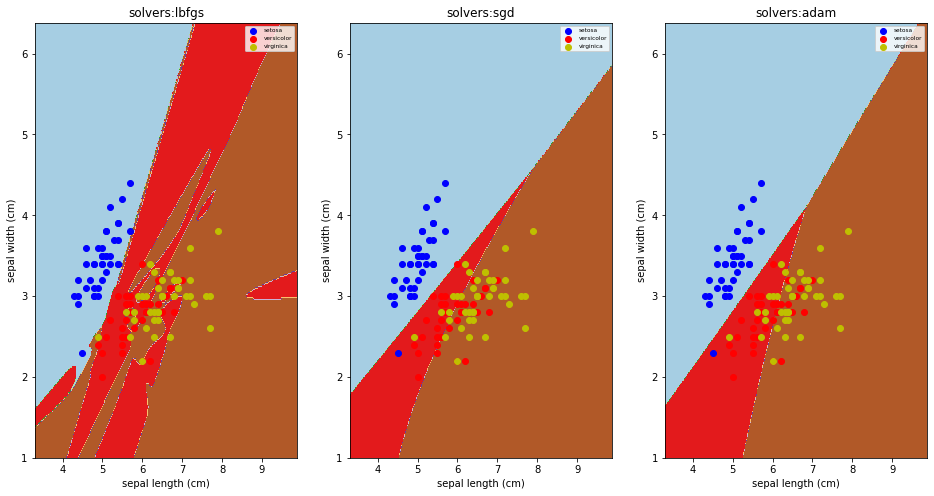

In [9]:
# 请输入代码：
fig=plt.figure()
fig.set_size_inches(16,8)
solvers=["lbfgs","sgd","adam"] 
for itx,solver in enumerate(solvers):
    ax=fig.add_subplot(1,3,itx+1)
    classifier=MLPClassifier(activation="tanh",max_iter=10000,hidden_layer_sizes=(30,),solver=solver)
    classifier.fit(X_train,y_train)
    train_score=classifier.score(X_train,y_train)
    test_score=classifier.score(X_test,y_test)
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 2
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 2
    plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
    plot_samples(ax,X_train,y_train)
    ax.legend(loc='best',fontsize='xx-small')
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_title("solvers:%s" % solver)
    print("solvers:%s;train score:%.2f;test score:%.2f"%(solver,train_score,test_score))
plt.show()


可以看到，不同的优化算法对性能有影响，但是相互之间没有显著差别

---

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h4> 练习1 </h4>
根据本实验的调参的例子，考察learning_rate_init初始学习率对多层神经网络分类器的影响<br>
</div>

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
☞ 轮到你了：
</div>

etas:[0.1, 0.01, 0.001, 0.0001];train score:0.76;test score:0.67
etas:[0.1, 0.01, 0.001, 0.0001];train score:0.76;test score:0.73
etas:[0.1, 0.01, 0.001, 0.0001];train score:0.77;test score:0.80
etas:[0.1, 0.01, 0.001, 0.0001];train score:0.70;test score:0.70


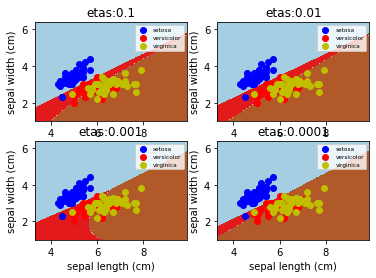

In [10]:
# 请输入代码：

import numpy as np
from sklearn.neural_network import MLPClassifier 
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

def plot_samples(ax,x,y):
    n_classes = 3
    plot_colors = "bry" # 颜色数组。每个类别的样本使用一种颜色
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax.scatter(x[idx, 0], x[idx, 1], c=color,label=iris.target_names[i], cmap=plt.cm.Paired) # 绘图

def plot_classifier_predict_meshgrid(ax,clf,x_min,x_max,y_min,y_max):
    plot_step = 0.02 # 步长
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired) # 绘图

iris = datasets.load_iris()
X = iris.data[:,0:2]
Y = iris.target
data = np.hstack((X,Y.reshape(Y.size,1)))
np.random.seed(0)
np.random.shuffle(data)
X = data[:,0:2]
Y = data[:,-1]
X_train = X[0:-30]
X_test = X[-30:]
y_train = Y[0:-30]
y_test = Y[-30:]

fig=plt.figure()
etas=[0.1,0.01,0.001,0.0001]
for itx,eta in enumerate(etas):
    ax=fig.add_subplot(2,2,itx+1)
    classifier=MLPClassifier(activation="tanh",max_iter=1000000,hidden_layer_sizes=(30,),solver='sgd',learning_rate_init=eta)
    classifier.fit(X_train,y_train)
    train_score=classifier.score(X_train,y_train)
    test_score=classifier.score(X_test,y_test)
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 2
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 2
    plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
    plot_samples(ax,X_train,y_train)
    ax.legend(loc='best',fontsize='xx-small')
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_title("etas:%s" % eta)
    print("etas:%s;train score:%.2f;test score:%.2f"%(etas,train_score,test_score))
plt.show()

<div align="right">
<a href="#q3" class="btn btn-default" data-toggle="collapse">获取答案</a>
</div>
<div id="q3" class="collapse">
    
代码：
``` Python
import numpy as np
from sklearn.neural_network import MLPClassifier 
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

def plot_samples(ax,x,y):
    n_classes = 3
    plot_colors = "bry" # 颜色数组。每个类别的样本使用一种颜色
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax.scatter(x[idx, 0], x[idx, 1], c=color,label=iris.target_names[i], cmap=plt.cm.Paired) # 绘图

def plot_classifier_predict_meshgrid(ax,clf,x_min,x_max,y_min,y_max):
    plot_step = 0.02 # 步长
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired) # 绘图

iris = datasets.load_iris()
X = iris.data[:,0:2]
Y = iris.target
data = np.hstack((X,Y.reshape(Y.size,1)))
np.random.seed(0)
np.random.shuffle(data)
X = data[:,0:2]
Y = data[:,-1]
X_train = X[0:-30]
X_test = X[-30:]
y_train = Y[0:-30]
y_test = Y[-30:]

fig=plt.figure()
etas=[0.1,0.01,0.001,0.0001]
for itx,eta in enumerate(etas):
    ax=fig.add_subplot(2,2,itx+1)
    classifier=MLPClassifier(activation="tanh",max_iter=1000000,hidden_layer_sizes=(30,),solver='sgd',learning_rate_init=eta)
    classifier.fit(X_train,y_train)
    train_score=classifier.score(X_train,y_train)
    test_score=classifier.score(X_test,y_test)
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 2
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 2
    plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
    plot_samples(ax,X_train,y_train)
    ax.legend(loc='best',fontsize='xx-small')
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_title("etas:%s" % eta)
    print("etas:%s;train score:%.2f;test score:%.2f"%(etas,train_score,test_score))
plt.show()
```
</div>


**感谢您完成本次实验！**

这是**基于sklearn的人工神经网络**实验的结尾。希望现在您对人工神经网络及其内容和流程的工作有了更深入的了解。感谢您阅读本次实验，祝您学习愉快

## 5.实验总结

多层感知器（MLP）是一种通过再数据集上训练，去自动学习函数f(.):Rm–>Ro的监督学习算法 ，m是输入的维度的数目 ，o是输出的维度数目。给定一组特征X=x1,x1….xm和目标y ，它可以以非线性函数实现分类或回归。它与逻辑回归不同，在输入和输出层之间，可以有一个或多个非线性层，称为隐藏层。

多层感知器的优点是：

* 能够学习非线性模型。

* 能够使用实时（在线学习）学习模型partial_fit。

多层感知器（MLP）的缺点包括：

* 具有隐藏层的MLP具有非凸损失函数，其中存在多于一个局部最小值。因此，不同的随机权重初始化可以导致不同的验证准确性。

* MLP需要调整许多超参数，例如隐藏神经元，层和迭代的数量。

* MLP对特征缩放很敏感。

<hr>

[<img src = "https://dolphin-public.oss-cn-shanghai.aliyuncs.com/img/copyright.png">](http://www.dolphin-labs.com)